# Classification of 3d-Shapes using a Multi-Layer Perceptron

<div style="text-align:right;">Author: Linus Rickman </div> 


In this project, the Scikit-learn MLPclassifier is used to identify images of 3d shapes. The dataset used consists of randomly generated images of different shapes. The dataset together with the blender script which was used to generate the dataset is found <a href="https://github.com/Rickmans/3d-shape-classifier">here</a>.

### Imports

In [1]:
import sklearn
import numpy as np
import os
import random
from skimage import io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Loading the images

First, we load the image data from the folders.

In [2]:
def get_filenames(dir, suffix):
    files = []
    for file in os.listdir(dir):
        if file.endswith(suffix):
            files.append(file)
    return files

In [3]:
types=["Torus","Cube","Sphere","Cone"]
images=[]
cls=[]
for typ in types:
    files=get_filenames(typ,"png")
    for file in files:
        images.append(io.imread(typ+"/"+file))
        cls.append(typ)

### Displaying images 

Then, we display four image examples from the dataset; a <em>torus,</em> a <em>cube</em>, a <em>sphere</em> and a <em>cone</em>.

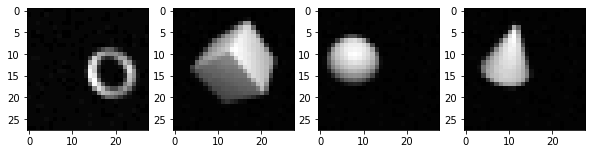

In [4]:
fig=plt.figure(figsize=(10,10))
im_inx=[8,2505,5002,7502]
for i in range(4):
    fig.add_subplot(1,4,i+1)
    plt.imshow(images[im_inx[i]], cmap='gray', interpolation='nearest')
plt.show()

### Vectorizing the images and classes 

In [5]:
type2inx={"Torus":0,"Cube":1,"Sphere":2,"Cone":3}
inx2type={0:"Torus",1:"Cube",2:"Sphere",3:"Cone"}

In [6]:
X=[]
y=[]
for im in images:
    X.append(np.asarray(im).ravel())
for ty in cls:
    y.append(type2inx[ty])

In [7]:
X, y = shuffle(X, y, random_state=3)

Separating the training and test set.

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Standardizing the data.

In [9]:
X_train=preprocessing.scale(X_train) 
X_test=preprocessing.scale(X_test) 

### Setting up and training the Multi-layer Perceptron  

Using a Multi-layer Perceptron with three hidden layers of sizes 350, 100 and 50 to classify the shapes.

In [10]:
clf=MLPClassifier(random_state=5, hidden_layer_sizes=(350,100,50 ),verbose=True, max_iter=100)

In [11]:
clf.fit(X_train,y_train);

Iteration 1, loss = 1.00034889
Iteration 2, loss = 0.67728239
Iteration 3, loss = 0.50989252
Iteration 4, loss = 0.42388543
Iteration 5, loss = 0.35509497
Iteration 6, loss = 0.29222530
Iteration 7, loss = 0.24688898
Iteration 8, loss = 0.24178936
Iteration 9, loss = 0.21680800
Iteration 10, loss = 0.17755227
Iteration 11, loss = 0.15849231
Iteration 12, loss = 0.13724824
Iteration 13, loss = 0.12642191
Iteration 14, loss = 0.10615266
Iteration 15, loss = 0.10159439
Iteration 16, loss = 0.08560093
Iteration 17, loss = 0.08156616
Iteration 18, loss = 0.10005361
Iteration 19, loss = 0.11456135
Iteration 20, loss = 0.10432489
Iteration 21, loss = 0.12580163
Iteration 22, loss = 0.06355053
Iteration 23, loss = 0.05435554
Iteration 24, loss = 0.06058472
Iteration 25, loss = 0.04814573
Iteration 26, loss = 0.05549496
Iteration 27, loss = 0.06435520
Iteration 28, loss = 0.05402657
Iteration 29, loss = 0.10459411
Iteration 30, loss = 0.11095195
Iteration 31, loss = 0.07063989
Iteration 32, los

### Evaluation 

In [12]:
y_val_pred=clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_val_pred, target_names=types))
print("Accuracy score: "+str(accuracy_score(y_test, y_val_pred))) 

              precision    recall  f1-score   support

       Torus       0.95      0.86      0.90       525
        Cube       0.89      0.88      0.88       505
      Sphere       0.89      0.95      0.92       493
        Cone       0.73      0.77      0.75       477

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.86      0.87      2000

Accuracy score: 0.8645


### Confusion Matrix 

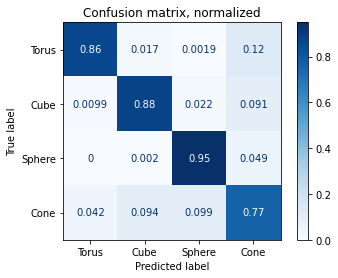

In [14]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=types,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title("Confusion matrix, normalized")
plt.show()

### Finding some of the errors

Image 1: Cone (Predicted: Torus)
Image 2: Cube (Predicted: Cone)
Image 3: Cone (Predicted: Torus)
Image 4: Torus (Predicted: Cone)
Image 5: Sphere (Predicted: Cone)
Image 6: Torus (Predicted: Cone)
Image 7: Torus (Predicted: Cone)


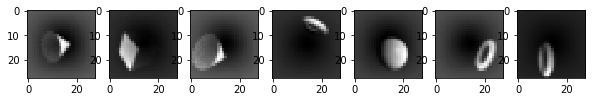

In [15]:
counter=0
nr_show=7
fig=plt.figure(figsize=(10,10))

for n in range(len(y_test)):
    if not y_test[n]==y_val_pred[n]:
        fig.add_subplot(1,nr_show,counter+1)
        print("Image "+str(counter+1)+": "+inx2type[y_test[n]]+" (Predicted: "+inx2type[y_val_pred[n]]+")")
        plt.imshow(X_test[n].reshape((28,28)), cmap='gray', interpolation='nearest');
        counter+=1
        if counter==nr_show: break
plt.show()

### Example

Prediction:
Torus	0.0%
Cube	0.1%
Sphere	0.0%
Cone	99.9%


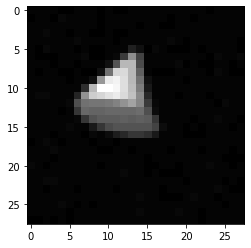

In [19]:
rn=random.randrange(0,len(images))
example=images[rn]
X_ex=np.asarray(example).ravel()
X_ex=[preprocessing.scale(X_ex)]
y_ex_pred = clf.predict_proba(X_ex).tolist()[0]
print("Prediction:")
for n in range(4):
    print(inx2type[n]+"\t"+str("%.1f" % (100*y_ex_pred[n]))+"%")
plt.imshow(example, cmap='gray', interpolation='nearest');


In [22]:
cls[rn]

'Cone'